In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import patsy

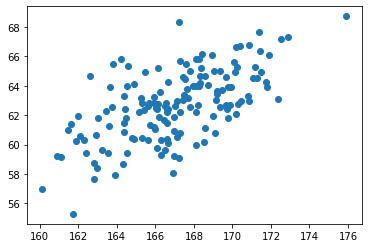

In [183]:
np.random.seed(321)
height = np.random.normal(167,3, 150) 
weight = -21.668269 + .504808*height + np.random.normal(0,2,150)
data = pd.DataFrame({'weight':weight,'height':height})
plt.scatter(data.height, data.weight)
plt.show()

In [184]:
model = sm.OLS.from_formula('weight ~ height', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     94.06
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.61e-17
Time:                        10:34:57   Log-Likelihood:                -307.08
No. Observations:                 150   AIC:                             618.2
Df Residuals:                     148   BIC:                             624.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.5544      8.895     -2.648      0.0

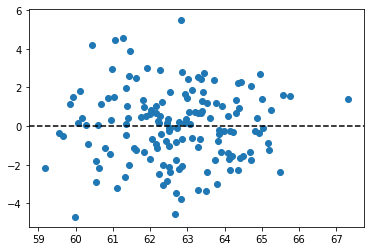

In [185]:
fitted_values = model.predict(data)
residuals = data.weight - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

(array([ 3.,  8., 21., 23., 31., 33., 17.,  9.,  3.,  2.]),
 array([-4.69693863, -3.67505904, -2.65317945, -1.63129986, -0.60942027,
         0.41245933,  1.43433892,  2.45621851,  3.4780981 ,  4.4999777 ,
         5.52185729]),
 <a list of 10 Patch objects>)

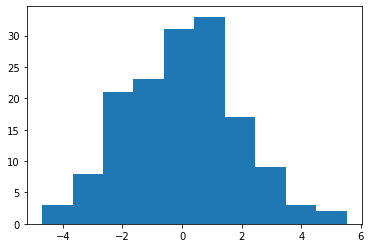

In [186]:
plt.hist(residuals)

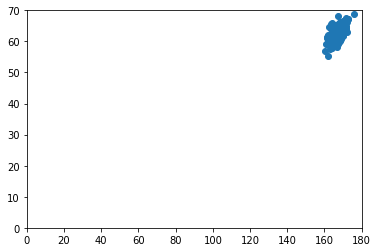

In [187]:
plt.scatter(data.height, data.weight)
plt.xlim(0,180)
plt.ylim(0,70)
plt.show()

In [188]:
data.height = data.height - np.mean(data.height)

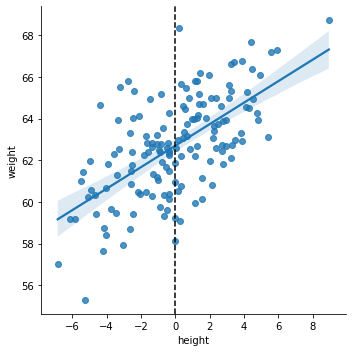

In [189]:
sns.lmplot('height', 'weight', data = data)
plt.axvline(0, color = 'black', linestyle = '--')
plt.show()

In [190]:
model = sm.OLS.from_formula('weight ~ height', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     94.06
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.61e-17
Time:                        10:35:16   Log-Likelihood:                -307.08
No. Observations:                 150   AIC:                             618.2
Df Residuals:                     148   BIC:                             624.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.7018      0.154    406.975      0.0

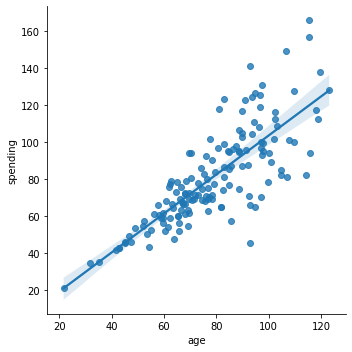

In [191]:
np.random.seed(3)
age = np.random.normal(40,20, 150) 
spending = 40 + age + np.random.normal(0,1,150)*age/3
age = age + 40
data2 = pd.DataFrame({'spending':spending,'age':age})
sns.lmplot('age', 'spending', data = data2)

In [142]:
model2 = sm.OLS.from_formula('spending ~ age', data=data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               spending   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     261.9
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.48e-34
Time:                        10:17:50   Log-Likelihood:                -623.96
No. Observations:                 150   AIC:                             1252.
Df Residuals:                     148   BIC:                             1258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9241      5.279     -0.364      0.7

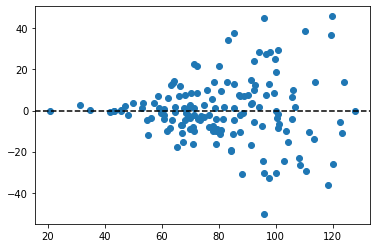

In [192]:
fitted_values = model2.predict(data2)
residuals = data2.spending - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

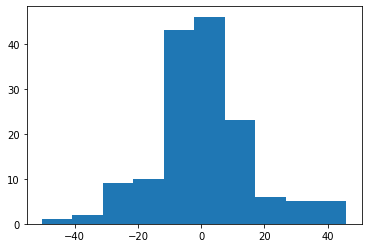

In [193]:
plt.hist(residuals)
plt.show()

In [194]:
data2['log_spending'] = np.log(data2.spending)
print(data2.head())

     spending         age  log_spending
0   93.992793  115.772569      4.543218
1  106.137987   88.730197      4.664740
2   64.865831   81.929949      4.172321
3   42.784399   42.730146      3.756174
4   74.480305   74.452236      4.310535


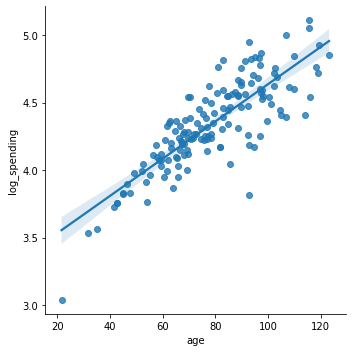

In [195]:
sns.lmplot('age', 'log_spending', data = data2)

In [196]:
model3 = sm.OLS.from_formula('log_spending ~ age', data=data2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           log_spending   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     322.1
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           5.64e-39
Time:                        10:36:00   Log-Likelihood:                 41.565
No. Observations:                 150   AIC:                            -79.13
Df Residuals:                     148   BIC:                            -73.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2549      0.062     52.102      0.0

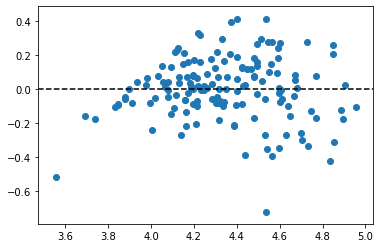

In [197]:
fitted_values = model3.predict(data2)
residuals = data2.log_spending - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

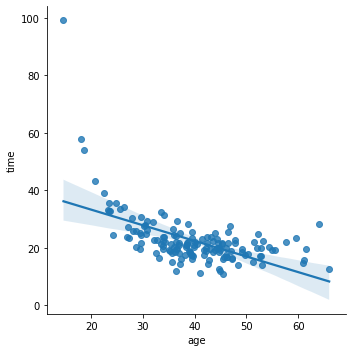

In [238]:
np.random.seed(111)
age = np.random.normal(-40,10, 150) 
time = 2 ** (-.3*age) + np.random.normal(0,40000,150)
age = age + 80
time = time + 200000
time = time/10000
data3 = pd.DataFrame({'time':time,'age':age})
sns.lmplot('age', 'time', data = data3)

In [239]:
model4 = sm.OLS.from_formula('time ~ age', data=data3).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     70.78
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           3.12e-14
Time:                        10:43:38   Log-Likelihood:                -516.67
No. Observations:                 150   AIC:                             1037.
Df Residuals:                     148   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1672      2.636     16.758      0.0

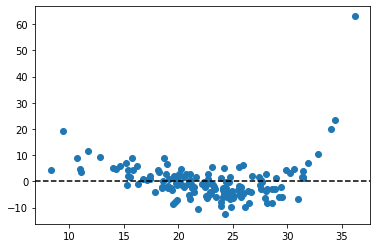

In [240]:
fitted_values = model4.predict(data3)
residuals = data3.time - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

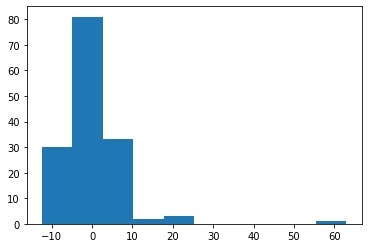

In [241]:
plt.hist(residuals)
plt.show()

In [242]:
data3['log_time'] = np.log(data3.time)
print(data3.head())

        time        age  log_time
0  20.401830  28.661617  3.015625
1  19.093524  43.843192  2.949349
2  19.083210  54.965538  2.948809
3  19.643086  36.446177  2.977725
4  22.705674  32.124665  3.122615


In [243]:
model5 = sm.OLS.from_formula('log_time ~ age', data=data3).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     84.41
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           3.37e-16
Time:                        10:43:56   Log-Likelihood:                 3.0805
No. Observations:                 150   AIC:                            -2.161
Df Residuals:                     148   BIC:                             3.860
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8033      0.082     46.144      0.0

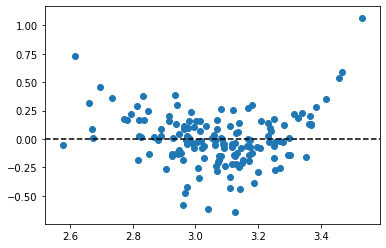

In [244]:
fitted_values = model5.predict(data3)
residuals = data3.log_time - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')

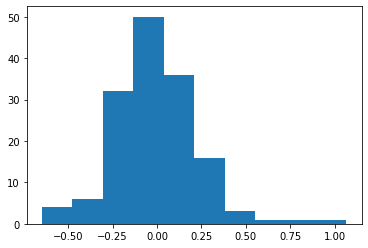

In [245]:
plt.hist(residuals)
plt.show()